# Honework_2

Author Joseph Korin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
def replace_textdata(df, pre_column, column, num_column, word = ''):        
    if word == '':
        df_miss_EFT = df[pd.isna(df[column])]
    else:
        df_miss_EFT = df[df[column] == word]
    model_miss_value = df_miss_EFT[pre_column].unique()
    model_is_value = {}
    for row in model_miss_value:
        if word == '':
            model_is_value.update({row:df[(pd.notnull(df[column])) & (df[pre_column]==row)].iloc[0, num_column]})
        else: model_is_value.update({row:df[(df[column] != word) & (df[pre_column]==row)].iloc[0, num_column]})
    miss_EFT = {}
    for model in  model_miss_value:
        indexes = []
        for index, _ in df_miss_EFT[df_miss_EFT[pre_column] == model].iterrows():
            indexes.append(index)
        miss_EFT.update({model: indexes})
    for key, value in miss_EFT.items():
        for i in value:
            df[column].iloc[i] = model_is_value.get(key)
    return df

# plot heatmap on how data columns are correlated
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)


def map_MSRP_to_group(x):
    if x<30000:
        return 'ordinary'
    elif x<60000 :
        return 'deluxe'
    elif x<90000:
        return 'super-deluxe'
    elif x<350000:
        return 'luxury'
    else:
        return 'super-luxury'
    
def convert_MSRP_series_to_MSRP_group(MSRP):
    return MSRP.apply(map_MSRP_to_group)

def test_model_r2(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
def test_model_mean_squared_error(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)
def test_model_mean_absolute_error(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)


In [3]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [4]:
df.iloc[81:92]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
81,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490
82,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25690
83,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013,30900
84,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795
85,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,21995
86,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,24490
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
89,Nissan,200SX,1996,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,29,21,2009,2000
90,Nissan,200SX,1997,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,29,21,2009,2000


Preprocessing

In [5]:
# drop Popularity and Market Category 
df = df.drop(['Popularity'], axis = 1)
df = df.drop(['Market Category'], axis = 1)

In [6]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [7]:
df[pd.isna(df['Engine Fuel Type'])]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,18499


In [8]:
# replace missing text using text data in simalar model
column = 'Engine Fuel Type'
pre_column = 'Model'
num_column = list(df.columns).index(column)
df = replace_textdata(df,pre_column, column, num_column)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [10]:
df[df['Transmission Type'] == "UNKNOWN"]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,Midsize,Coupe,29,19,2000
1290,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,Midsize,Sedan,29,19,2000
4691,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,6175
4692,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,2dr Hatchback,23,15,8548
4693,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,Midsize,Convertible,23,15,9567
6158,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,19,14,2182
6160,GMC,Jimmy,1999,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,19,14,2317
6165,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,rear wheel drive,2.0,Compact,2dr SUV,20,15,2407
6174,GMC,Jimmy,2000,regular unleaded,190.0,6.0,UNKNOWN,four wheel drive,2.0,Compact,2dr SUV,18,14,2578
6366,Chrysler,Le Baron,1993,regular unleaded,100.0,4.0,UNKNOWN,front wheel drive,2.0,Compact,Coupe,26,21,2000


In [11]:
column = 'Transmission Type'
pre_column = 'Model'
num_column = list(df.columns).index(column)
type_nan = 'UNKNOWN'
df.source = replace_textdata(df, pre_column, column, num_column, type_nan)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\korin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [12]:
df["Number of Doors"].unique()

array([ 2.,  4.,  3., nan])

In [13]:
column = 'Number of Doors'
pre_column = 'Model'
num_column = list(df.columns).index(column)
df.source = replace_textdata(df, pre_column, column, num_column)

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
for index, row in df.iterrows():
    if df['Engine Fuel Type'].iloc[index] == 'electric':
        df['Engine Cylinders'].iloc[index] = 0.0
#df = df.replace_by_median(np.nan, columns='Engine Cylinders')
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace = True)
df[['Engine Cylinders']] = df[['Engine Cylinders']].astype("int")

C:\Users\korin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


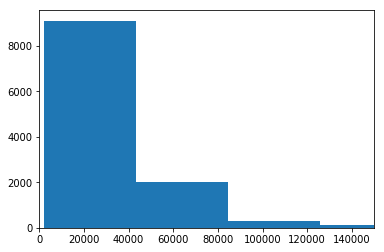

Populating the interactive namespace from numpy and matplotlib


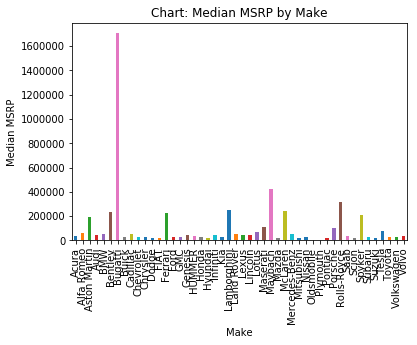

In [15]:
plt.hist(df.source['MSRP'], bins=50)
plt.xlim(0,150000)
plt.show()
%pylab inline
Make = df.source.groupby(['Make'])['MSRP'].median()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Median MSRP')
pylab.title('Chart: Median MSRP by Make')
plt.show()

From the above plot, we see that the Make of a car has a significant impact on price. This is obvious as different manufacturers produce cars in different price ranges. It might be difficult for a single model to fit well to all the data. So, it might be wise to divide the data w.r.t price and then we can have individual models for a single price range.

In [16]:
df=df.join(df.groupby('Make')['MSRP'].median(), on='Make', rsuffix='_Median')
make = df.groupby('Make')['MSRP'].median().reset_index()
pd.options.display.float_format = '{:.4f}'.format
make.sort_values('MSRP', ascending=False)

MSRP_group=convert_MSRP_series_to_MSRP_group(df['MSRP_Median'])
df['MSRP_group'] = MSRP_group
df.iloc[1043:1057]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,MSRP_Median,MSRP_group
1043,Audi,A3,2016,premium unleaded (recommended),220.0000,4,AUTOMATED_MANUAL,all wheel drive,4.0000,Compact,Sedan,33,24,36900,46725.0000,deluxe
1044,Audi,A3,2016,premium unleaded (recommended),170.0000,4,AUTOMATED_MANUAL,front wheel drive,4.0000,Compact,Sedan,33,23,33600,46725.0000,deluxe
1045,Audi,A3,2016,premium unleaded (recommended),170.0000,4,AUTOMATED_MANUAL,front wheel drive,4.0000,Compact,Sedan,33,23,30900,46725.0000,deluxe
1046,Audi,A3,2016,premium unleaded (recommended),170.0000,4,AUTOMATED_MANUAL,front wheel drive,2.0000,Compact,Convertible,35,24,40100,46725.0000,deluxe
1047,Audi,A3,2016,premium unleaded (recommended),220.0000,4,AUTOMATED_MANUAL,all wheel drive,2.0000,Compact,Convertible,32,23,42300,46725.0000,deluxe
1048,Audi,A3,2016,diesel,150.0000,4,AUTOMATED_MANUAL,front wheel drive,4.0000,Compact,Sedan,43,31,42050,46725.0000,deluxe
1049,Audi,A3,2017,premium unleaded (recommended),220.0000,4,AUTOMATED_MANUAL,all wheel drive,4.0000,Compact,Sedan,35,26,43150,46725.0000,deluxe
1050,Audi,A3,2017,premium unleaded (recommended),186.0000,4,AUTOMATED_MANUAL,front wheel drive,4.0000,Compact,Sedan,35,26,40150,46725.0000,deluxe
1051,Audi,A3,2017,premium unleaded (recommended),220.0000,4,AUTOMATED_MANUAL,all wheel drive,4.0000,Compact,Sedan,35,26,37450,46725.0000,deluxe
1052,Audi,A3,2017,premium unleaded (recommended),186.0000,4,AUTOMATED_MANUAL,front wheel drive,2.0000,Compact,Convertible,34,25,37600,46725.0000,deluxe


In [17]:
df[df['MSRP_group']=='ordinary']['Make'].unique()

array(['FIAT', 'Chrysler', 'Nissan', 'Mazda', 'Mitsubishi', 'Pontiac',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Kia', 'Chevrolet', 'Dodge', 'Subaru', 'Volkswagen', 'Scion'],
      dtype=object)

In [18]:
df[df['MSRP_group']=='deluxe']['Make'].unique()

array(['BMW', 'Audi', 'Mercedes-Benz', 'Volvo', 'Toyota', 'Saab', 'GMC',
       'Cadillac', 'Lincoln', 'Buick', 'Acura', 'Lexus', 'Land Rover',
       'Infiniti', 'Genesis', 'HUMMER'], dtype=object)

In [19]:
df[df['MSRP_group']=='super-deluxe']['Make'].unique()

array(['Alfa Romeo', 'Lotus', 'Tesla'], dtype=object)

In [20]:
df[df['MSRP_group']=='luxury']['Make'].unique()

array(['Ferrari', 'McLaren', 'Porsche', 'Bentley', 'Lamborghini',
       'Spyker', 'Rolls-Royce', 'Maserati', 'Aston Martin'], dtype=object)

In [21]:
df[df['MSRP_group']=='super-luxury']['Make'].unique()

array(['Maybach', 'Bugatti'], dtype=object)

In [22]:
# make files with distirbusion category
ordinary='ordinary.csv'
deluxe='deluxe.csv'
supdel='supdel.csv'
luxury='luxury.csv'
suplux='suplux.csv'
df[df['MSRP_group']=='ordinary'].to_csv(ordinary, index = False)
df[df['MSRP_group']=='deluxe'].to_csv(deluxe, index = False)
df[df['MSRP_group']=='super-deluxe'].to_csv(supdel, index = False)
df[df['MSRP_group']=='luxury'].to_csv(luxury, index = False)
df[df['MSRP_group']=='super-luxury'].to_csv(suplux, index = False)

Here, we shall provide the analysis for just one of the files. The remaining files will be processed in the same manner. Lets have a look at the ordinary category

In [23]:
df_ordinary = pd.read_csv('ordinary.csv')

df_ordinary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 16 columns):
Make                 6950 non-null object
Model                6950 non-null object
Year                 6950 non-null int64
Engine Fuel Type     6950 non-null object
Engine HP            6910 non-null float64
Engine Cylinders     6950 non-null int64
Transmission Type    6950 non-null object
Driven_Wheels        6950 non-null object
Number of Doors      6950 non-null float64
Vehicle Size         6950 non-null object
Vehicle Style        6950 non-null object
highway MPG          6950 non-null int64
city mpg             6950 non-null int64
MSRP                 6950 non-null int64
MSRP_Median          6950 non-null float64
MSRP_group           6950 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 868.8+ KB


In [24]:
df_ordinary = df_ordinary.drop(['MSRP_group','MSRP_Median'],axis=1)
df_ordinary['Engine HP'].fillna(df_ordinary['Engine HP'].mean(), inplace = True)

max_age = df_ordinary['Year'].max()
df_ordinary['Age'] = max_age - df_ordinary['Year']
df_ordinary.drop("Year", axis = 1, inplace=True)

df_ordinary[['Engine HP']] = df_ordinary[['Engine HP']].astype("int")
df_ordinary[['Number of Doors']] = df_ordinary[['Number of Doors']].astype("int")

In [25]:
df_ordinary.iloc[:]

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age
0,FIAT,124 Spider,premium unleaded (recommended),160,4,MANUAL,rear wheel drive,2,Compact,Convertible,35,26,27495,0
1,FIAT,124 Spider,premium unleaded (recommended),160,4,MANUAL,rear wheel drive,2,Compact,Convertible,35,26,24995,0
2,FIAT,124 Spider,premium unleaded (recommended),160,4,MANUAL,rear wheel drive,2,Compact,Convertible,35,26,28195,0
3,Chrysler,200,flex-fuel (unleaded/E85),184,4,AUTOMATIC,front wheel drive,4,Midsize,Sedan,36,23,25170,2
4,Chrysler,200,flex-fuel (unleaded/E85),184,4,AUTOMATIC,front wheel drive,4,Midsize,Sedan,36,23,23950,2
5,Chrysler,200,flex-fuel (unleaded/E85),295,6,AUTOMATIC,all wheel drive,4,Midsize,Sedan,29,18,29370,2
6,Chrysler,200,flex-fuel (unleaded/E85),184,4,AUTOMATIC,front wheel drive,4,Midsize,Sedan,36,23,21995,2
7,Chrysler,200,flex-fuel (unleaded/E85),184,4,AUTOMATIC,front wheel drive,4,Midsize,Sedan,36,23,26625,2
8,Chrysler,200,flex-fuel (unleaded/E85),295,6,AUTOMATIC,all wheel drive,4,Midsize,Sedan,29,18,30825,2
9,Chrysler,200,flex-fuel (unleaded/E85),184,4,AUTOMATIC,front wheel drive,4,Midsize,Sedan,36,23,21995,1


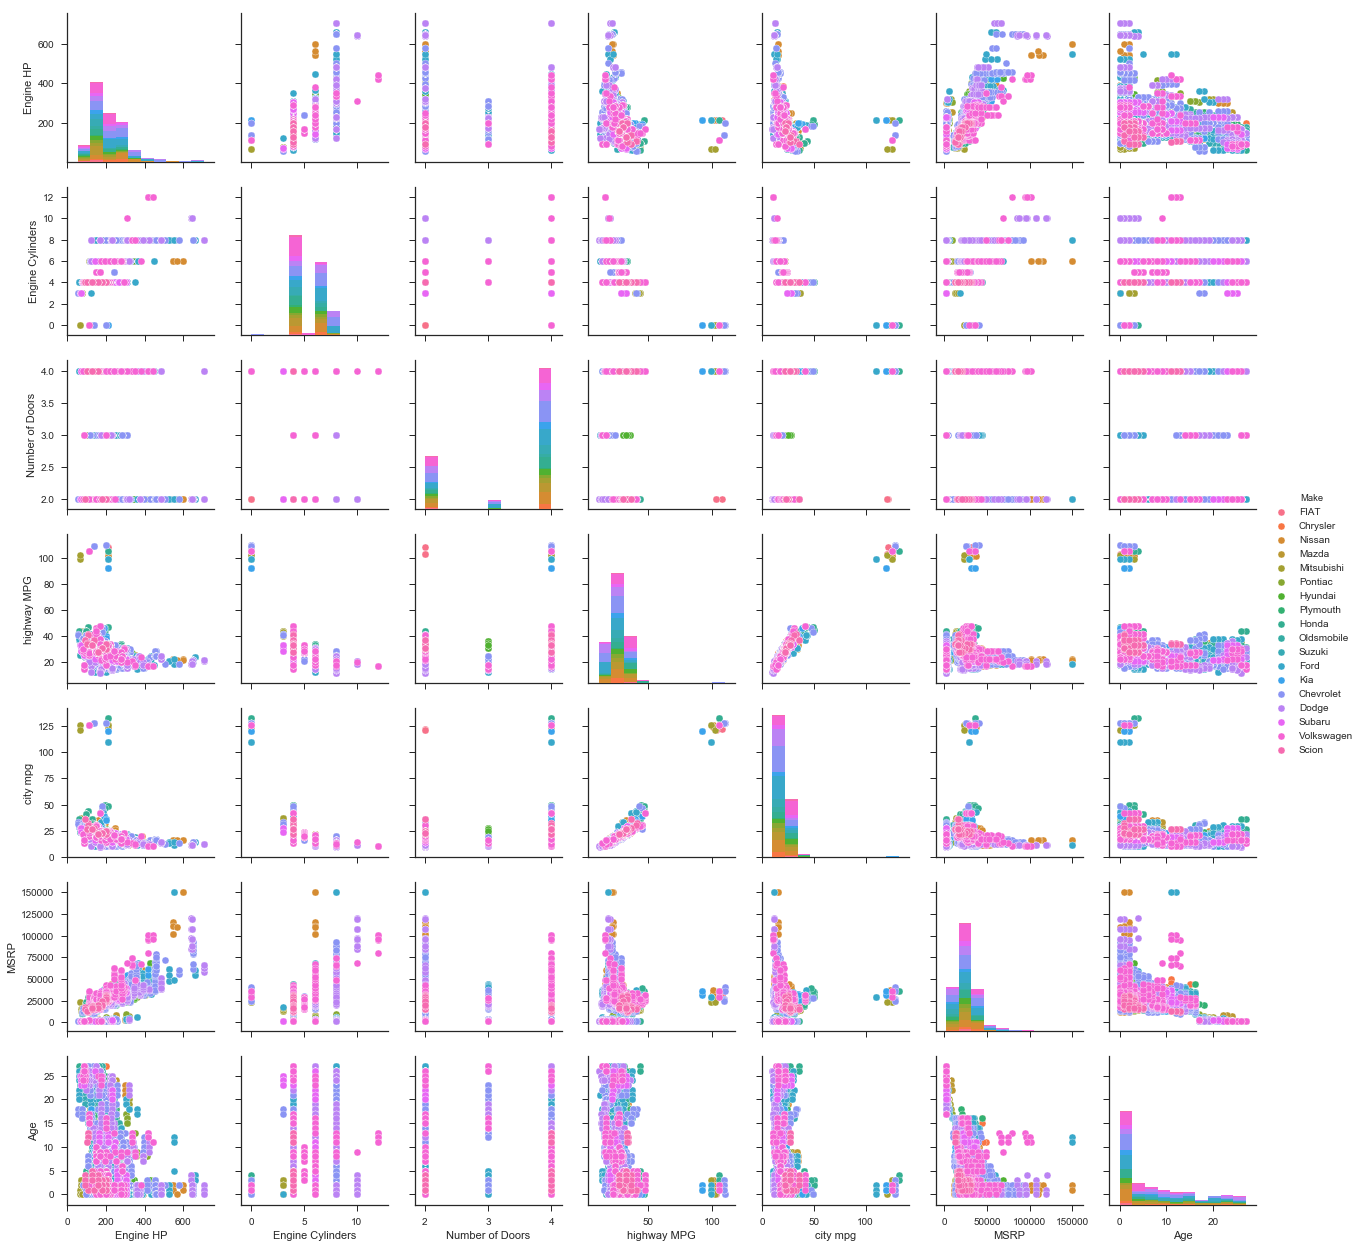

In [26]:
sb.set(style="ticks")
sb.pairplot(df_ordinary, hue='Make')

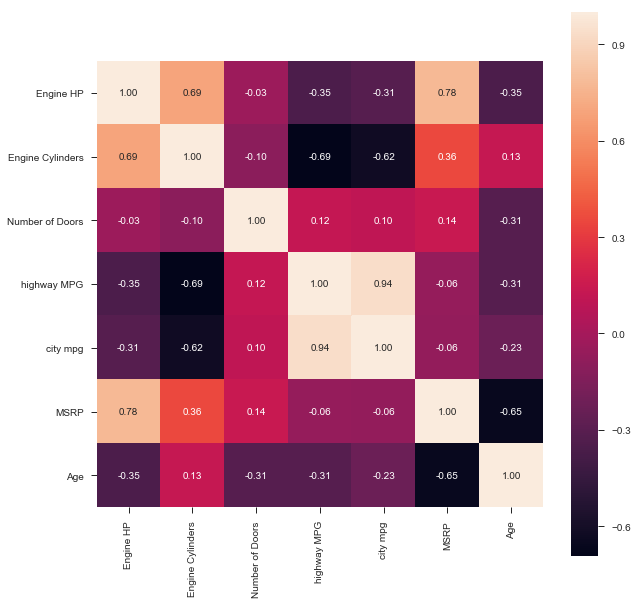

In [27]:
# plot correlation of our data
df_or = df_ordinary[["Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg","MSRP", "Age"]]
columns = df_or.columns
plot_correlation(df_or, columns)

In [28]:
df_ordinary=df_ordinary.drop(['highway MPG'],axis=1)

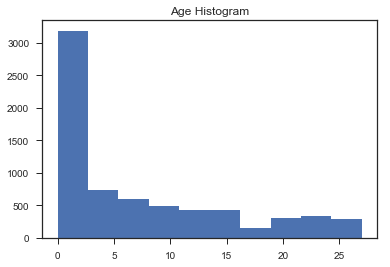

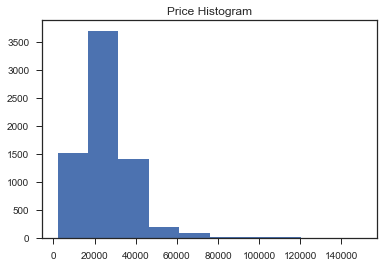

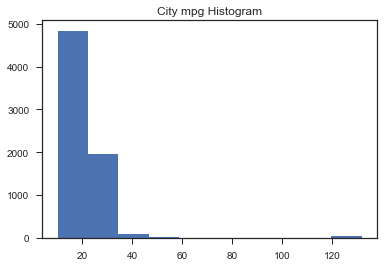

In [29]:
plt.hist(df_ordinary['Age'])
plt.title('Age Histogram')
plt.show()
plt.hist(df_ordinary['MSRP'])
plt.title('Price Histogram')
plt.show()
plt.hist(df_ordinary['city mpg'])
plt.title('City mpg Histogram')
plt.show()

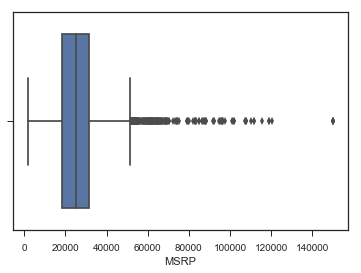

In [30]:
sb.boxplot(x=df_ordinary['MSRP'])

In [31]:
df_ordinary = df_ordinary[df_ordinary['MSRP']<140000]

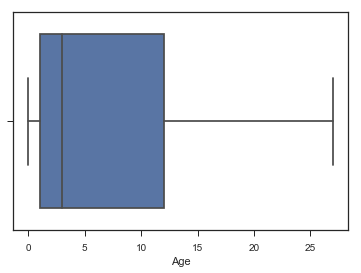

In [32]:
sb.boxplot(x=df_ordinary['Age'])

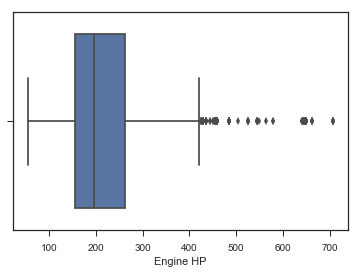

In [33]:
sb.boxplot(x=df_ordinary['Engine HP'])

In [34]:
df_ordinary = df_ordinary[df_ordinary['Engine HP'] < 700]

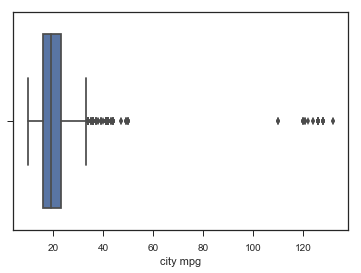

In [35]:
sb.boxplot(x=df_ordinary["city mpg"])

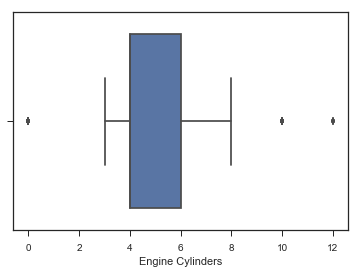

In [36]:
sb.boxplot(x=df_ordinary["Engine Cylinders"])

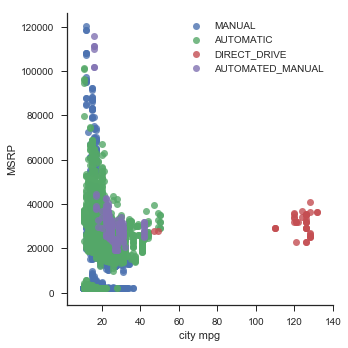

In [38]:
sb.lmplot(x="city mpg", y="MSRP", data=df_ordinary, fit_reg=False, hue='Transmission Type', legend=False)
plt.legend(loc='upper right')

In [39]:
corr = df_ordinary.corr()
corr['MSRP'].sort_values(ascending=True)

Age                -0.6693
city mpg           -0.0606
Number of Doors     0.1565
Engine Cylinders    0.3553
Engine HP           0.7768
MSRP                1.0000
Name: MSRP, dtype: float64

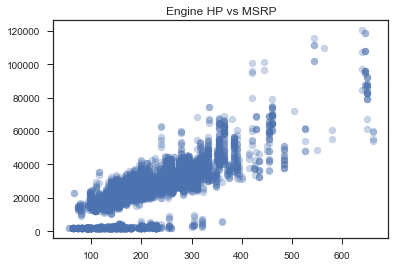

In [40]:
plt.scatter(df_ordinary['Engine HP'], df_ordinary['MSRP'], alpha=.3)
plt.title('Engine HP vs MSRP')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

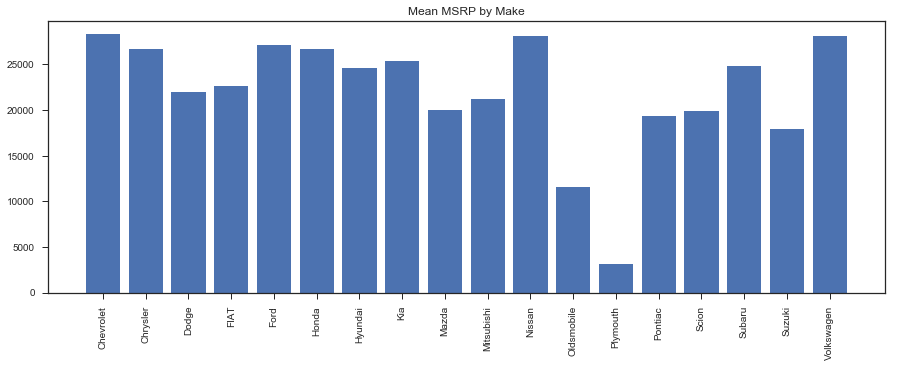

In [41]:
fig, (ax1) = plt.subplots(1,1,figsize=(15,5))
Make = df_ordinary.groupby(['Make'])['MSRP'].mean()
Model = df_ordinary.groupby(['Model'])['MSRP'].mean()
FuelType = df_ordinary.groupby(['Engine Fuel Type'])['MSRP'].mean()
Transmission = df_ordinary.groupby(['Transmission Type'])['MSRP'].mean()
DrivenWheels = df_ordinary.groupby(['Driven_Wheels'])['MSRP'].mean()
VehicleSize = df_ordinary.groupby(['Vehicle Size'])['MSRP'].mean()
VehicleStyle = df_ordinary.groupby(['Vehicle Style'])['MSRP'].mean()
ax1.bar(Make.index, Make.values)
ax1.set_title('Mean MSRP by Make')
plt.sca(ax1)
plt.xticks(rotation=90)

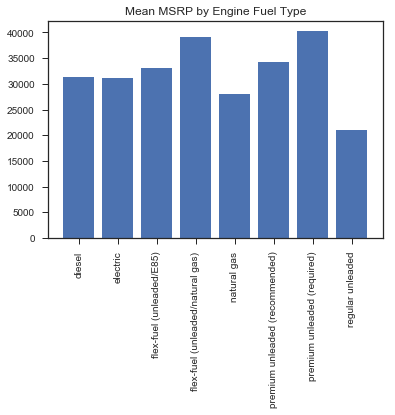

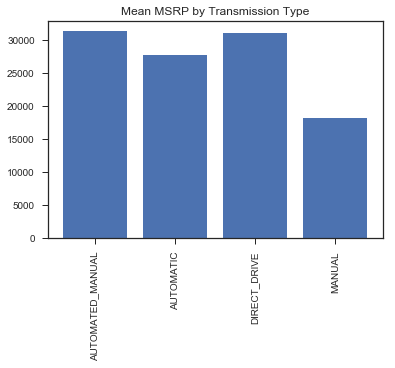

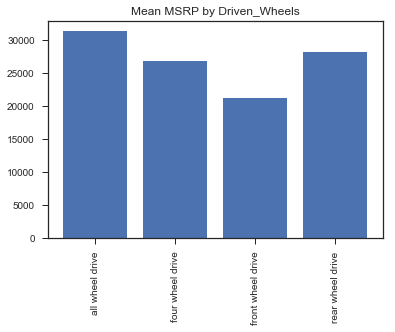

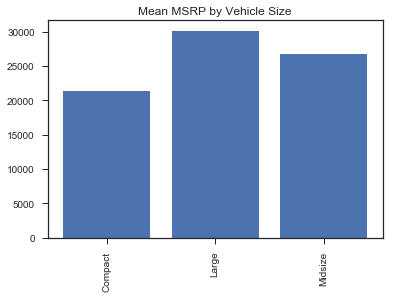

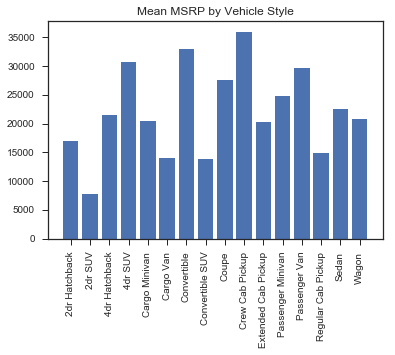

In [42]:
plt.bar(FuelType.index, FuelType.values)
plt.title('Mean MSRP by Engine Fuel Type')
plt.xticks(rotation=90)
plt.show()
plt.bar(Transmission.index, Transmission.values)
plt.title('Mean MSRP by Transmission Type')
plt.xticks(rotation=90)
plt.show()
plt.bar(DrivenWheels.index, DrivenWheels.values)
plt.title('Mean MSRP by Driven_Wheels')
plt.xticks(rotation=90)
plt.show()
plt.bar(VehicleSize.index, VehicleSize.values)
plt.title('Mean MSRP by Vehicle Size')
plt.xticks(rotation=90)
plt.show()
plt.bar(VehicleStyle.index, VehicleStyle.values)
plt.title('Mean MSRP by Vehicle Style')
plt.xticks(rotation=90)
plt.show()

In [43]:
Makes = ['Ford','Chevrolet','Chrysler','Pontiac','Subaru','Hyundai','Honda','Mazda', 'Nissan','Suzuki']
df_ordinary = df_ordinary[df_ordinary.Make.isin(Makes)]
df_ordinary.Make.value_counts()

Chevrolet    1123
Ford          879
Nissan        556
Honda         449
Mazda         423
Suzuki        351
Hyundai       303
Subaru        256
Chrysler      187
Pontiac       186
Name: Make, dtype: int64

In [44]:
# get main corelation feature
df_ordinary = \
df_ordinary[['Engine HP', 'Age', 'city mpg', 'Engine Fuel Type','Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'Make', 'MSRP']]

In [45]:
dummy_Engine_Fuel_Type = pd.get_dummies(df_ordinary["Make"])
df_ordinary = pd.concat([df_ordinary, dummy_Engine_Fuel_Type], axis=1)
df_ordinary.drop("Make", axis = 1, inplace=True)

dummy_Engine_Fuel_Type = pd.get_dummies(df_ordinary["Engine Fuel Type"])
df_ordinary = pd.concat([df_ordinary, dummy_Engine_Fuel_Type], axis=1)
df_ordinary.drop("Engine Fuel Type", axis = 1, inplace=True)

dummy_Transmission_Type = pd.get_dummies(df_ordinary["Transmission Type"])
df_ordinary = pd.concat([df_ordinary, dummy_Transmission_Type], axis=1)
df_ordinary.drop("Transmission Type", axis = 1, inplace=True)

dummy_Driven_Wheels = pd.get_dummies(df_ordinary["Driven_Wheels"])
df_ordinary = pd.concat([df_ordinary, dummy_Driven_Wheels], axis=1)
df_ordinary.drop("Driven_Wheels", axis = 1, inplace=True)

dummy_Engine_Cylinders = pd.get_dummies(df_ordinary["Vehicle Size"])
df_ordinary = pd.concat([df_ordinary, dummy_Engine_Cylinders], axis=1)
df_ordinary.drop("Vehicle Size", axis = 1, inplace=True)

dummy_Engine_Cylinders = pd.get_dummies(df_ordinary["Vehicle Style"])
df_ordinary = pd.concat([df_ordinary, dummy_Engine_Cylinders], axis=1)
df_ordinary.drop("Vehicle Style", axis = 1, inplace=True)

In [46]:
df_ordinary = df_ordinary[['Engine HP', 'Age', 'city mpg', 'Chevrolet', 'Chrysler', 'Ford',
       'Honda', 'Hyundai', 'Mazda', 'Nissan', 'Pontiac', 'Subaru', 'Suzuki',
       'diesel', 'electric', 'flex-fuel (unleaded/E85)',
       'flex-fuel (unleaded/natural gas)', 'natural gas',
       'premium unleaded (recommended)', 'premium unleaded (required)',
       'regular unleaded', 'AUTOMATED_MANUAL', 'AUTOMATIC', 'DIRECT_DRIVE',
       'MANUAL', 'all wheel drive', 'four wheel drive', 'front wheel drive',
       'rear wheel drive', 'Compact', 'Large', 'Midsize', '2dr Hatchback',
       '2dr SUV', '4dr Hatchback', '4dr SUV', 'Cargo Minivan', 'Cargo Van',
       'Convertible', 'Convertible SUV', 'Coupe', 'Crew Cab Pickup',
       'Extended Cab Pickup', 'Passenger Minivan', 'Passenger Van',
       'Regular Cab Pickup', 'Sedan', 'Wagon', 'MSRP']]

Train zoo models

In [47]:
# select first N-1 columns and assign it to variable X
X = df_ordinary.values[:, :-1]
# select the last column and assign it to variable y
y = df_ordinary.values[:, -1]

In [48]:
# use RobustScaler to fit and transform your data
# initialize RobustScaler with the next parameters: with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0)
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
# scale X data with the scaler and assign its value to X_scaled
X_scaled = rs.fit_transform(X)

In [49]:
# use train_test_split function to generate train and test data in proportion of 0.75/0.25 with shuffling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle = True, random_state = 42)

In [50]:
from sklearn.linear_model import LinearRegression

# use LinearRegression class to test on your data
# create LinearRegression class instance
lin_reg = LinearRegression()
# get r_squared score
r2_1 = test_model_r2(lin_reg, X_train, X_test, y_train, y_test)
mean_squared_error_1 = test_model_mean_squared_error(lin_reg, X_train, X_test, y_train, y_test)
mean_absolute_error_1 = test_model_mean_absolute_error(lin_reg, X_train, X_test, y_train, y_test)
# print the score
print("r2_1 = {}\nmean_squared_error_1 = {}\nmean_absolute_error_1 = {}\n".format(r2_1, mean_squared_error_1, mean_absolute_error_1))

r2_1 = 0.8451534883912403
mean_squared_error_1 = 28624383.44907678
mean_absolute_error_1 = 4049.9994331289063



In [51]:
from sklearn.linear_model import Lasso

# use Lasso class to test on your data
# create Lasso class instance
lasso = Lasso(alpha = 0.0001)
# get r_squared score
r2_2 = test_model_r2(lasso, X_train, X_test, y_train, y_test)
mean_squared_error_2 = test_model_mean_squared_error(lasso, X_train, X_test, y_train, y_test)
mean_absolute_error_2 = test_model_mean_absolute_error(lasso, X_train, X_test, y_train, y_test)
# print the score
print("r2_1 = {}\nmean_squared_error_1 = {}\nmean_absolute_error_1 = {}\n".format(r2_2, mean_squared_error_2, mean_absolute_error_2))

C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


r2_1 = 0.8451020385899197
mean_squared_error_1 = 28633894.279034007
mean_absolute_error_1 = 4051.5147028099036



C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [52]:
from sklearn.linear_model import Ridge

# use Ridge class to test on your data
# create Ridge class instance
ridge = Ridge(alpha = 0.001)
# get r_squared score
r2_3 = test_model_r2(ridge, X_train, X_test, y_train, y_test)
mean_squared_error_3 = test_model_mean_squared_error(ridge, X_train, X_test, y_train, y_test)
mean_absolute_error_3 = test_model_mean_absolute_error(ridge, X_train, X_test, y_train, y_test)
# print the score
print("r2_3 = {}\nmean_squared_error_3 = {}\nmean_absolute_error_3 = {}\n".format(r2_3, mean_squared_error_3, mean_absolute_error_3))

r2_3 = 0.8451532656502969
mean_squared_error_3 = 28624424.624186948
mean_absolute_error_3 = 4050.009463914824



In [53]:
from sklearn.linear_model import ElasticNet

# use ElasticNet class to test on your data
# create ElasticNet class instance
elastic = ElasticNet(alpha = 0.00001)
# get r_squared score
r2_4 = test_model_r2(elastic, X_train, X_test, y_train, y_test)
mean_squared_error_4 = test_model_mean_squared_error(elastic, X_train, X_test, y_train, y_test)
mean_absolute_error_4 = test_model_mean_absolute_error(elastic, X_train, X_test, y_train, y_test)
# print the score
print("r2_4 = {}\nmean_squared_error_4 = {}\nmean_absolute_error_4 = {}\n".format(r2_4, mean_squared_error_4, mean_absolute_error_4))

C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


r2_4 = 0.8451089212874733
mean_squared_error_4 = 28632621.96768587
mean_absolute_error_4 = 4051.4644473477483



C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=20, n_estimators=100, learning_rate=0.1, random_state=42)

r2_5 = test_model_r2(gbrt_reg, X_train, X_test, y_train, y_test)
mean_squared_error_5 = test_model_mean_squared_error(gbrt_reg, X_train, X_test, y_train, y_test)
mean_absolute_error_5 = test_model_mean_absolute_error(gbrt_reg, X_train, X_test, y_train, y_test)
# print the score
print("r2_5 = {}\nmean_squared_error_5 = {}\nmean_absolute_error_5 = {}\n".format(r2_5, mean_squared_error_5, mean_absolute_error_5))

r2_5 = 0.9425948452472779
mean_squared_error_5 = 10611715.721095735
mean_absolute_error_5 = 2252.002018961095



In [55]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha = 0.001, max_iter = 10000000, tol = 0.1, shuffle = True, random_state = 40)
# get r_squared score
r2_6 = test_model_r2(sgd_reg, X_train, X_test, y_train, y_test)
mean_squared_error_6 = test_model_mean_squared_error(sgd_reg, X_train, X_test, y_train, y_test)
mean_absolute_error_6 = test_model_mean_absolute_error(sgd_reg, X_train, X_test, y_train, y_test)
# print the score
print("r2_6 = {}\nmean_squared_error_6 = {}\nmean_absolute_error_6 = {}\n".format(r2_6, mean_squared_error_6, mean_absolute_error_6))

r2_6 = 0.844195325193455
mean_squared_error_6 = 28801506.139767412
mean_absolute_error_6 = 4062.7414534001846



In [56]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

r2_7 = test_model_r2(xg_reg, X_train, X_test, y_train, y_test)
mean_squared_error_7 = test_model_mean_squared_error(xg_reg, X_train, X_test, y_train, y_test)
mean_absolute_error_7 = test_model_mean_absolute_error(xg_reg, X_train, X_test, y_train, y_test)
# print the score
print("r2_7 = {}\nmean_squared_error_7 = {}\nmean_absolute_error_7 = {}\n".format(r2_7, mean_squared_error_7, mean_absolute_error_7))

r2_7 = 0.9557586395756453
mean_squared_error_7 = 8178302.836393372
mean_absolute_error_7 = 1960.6397454721755



In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

r2_8 = test_model_r2(lin_reg, X_train, X_test, y_train, y_test)
mean_squared_error_8 = test_model_mean_squared_error(lin_reg, X_train, X_test, y_train, y_test)
mean_absolute_error_8 = test_model_mean_absolute_error(lin_reg, X_train, X_test, y_train, y_test)
# print the score
print("r2_8 = {}\nmean_squared_error_8 = {}\nmean_absolute_error_8 = {}\n".format(r2_8, mean_squared_error_8, mean_absolute_error_8))

r2_8 = 0.8451534883912403
mean_squared_error_8 = 28624383.44907678
mean_absolute_error_8 = 4049.9994331289063



The best score we get from model XGBRegressor

r2_7 = 0.9557586395756453

mean_squared_error_7 = 8178302.836393372

mean_absolute_error_7 = 1960.6397454721755